In [455]:
import csv 

In [456]:
import pandas as pd

In [457]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
%matplotlib inline

In [458]:
#/// Bithrate

In [459]:
birthrate_df = pd.read_csv("../FRED/Crude_Birth_Rate.csv")
birthrate_df.head(2)
# This is the birthrate csv by year. 

,DATE,SPDYNCBRTINUSA
0,1960-01-01,23.7
1,1961-01-01,23.3


In [460]:
birthrate_df = birthrate_df.rename(columns={'SPDYNCBRTINUSA': 'BirthRate'})
#I renamed the titles to make it clearer. 

In [461]:
birthrate_df.head(2)

,DATE,BirthRate
0,1960-01-01,23.7
1,1961-01-01,23.3


In [462]:
birthrate_df.describe()

,BirthRate
count,62.000000
mean,15.375806
std,2.800567
min,10.900000
25%,14.000000
50%,14.900000
75%,15.975000
max,23.700000


In [463]:
birthrate_df = pd.DataFrame(birthrate_df)

# Create a new DataFrame 'NewBirthrate' 
#with a 'Year' column extracted from the 'DATE' column
NewBirthrate = pd.DataFrame()
NewBirthrate['Year'] = pd.to_datetime(birthrate_df['DATE']).dt.year
NewBirthrate['BirthRate'] = birthrate_df['BirthRate']  
NewBirthrate.head(2)

,Year,BirthRate
0,1960,23.7
1,1961,23.3


In [464]:
metausers_df = pd.read_csv("../FRED/Meta_Users_2016_2022.csv")
metausers_df.head(8)

,Year,Users_Q4
0,2016,1.860
1,2017,2.129
2,2018,2.320
3,2019,2.498
4,2020,2.797
5,2021,2.912
6,2022,2.963
7,2023,3.980


In [465]:
metausers_df = metausers_df.rename(columns={'Users_Q4': 'META_users_Q4'})

#I renamed the titles to make it clearer. 

In [466]:
metausers_df.head()

,Year,META_users_Q4
0,2016,1.860
1,2017,2.129
2,2018,2.320
3,2019,2.498
4,2020,2.797


In [467]:
# Calculate percentage change and store in a new column
NewBirthrate['BirthRate_PercentageChange'] = NewBirthrate['BirthRate'].pct_change() * 100
NewBirthrate.head(5)

,Year,BirthRate,BirthRate_PercentageChange
0,1960,23.7,NaN
1,1961,23.3,-1.687764
2,1962,22.4,-3.862661
3,1963,21.7,-3.125000
4,1964,21.1,-2.764977


In [468]:
NewBirthrate.tail(5)

,Year,BirthRate,BirthRate_PercentageChange
57,2017,11.8,-3.278689
58,2018,11.6,-1.694915
59,2019,11.4,-1.724138
60,2020,10.9,-4.385965
61,2021,11.0,0.917431


In [469]:
# Which year had the biggest percentage change to the negative and positive?
#maximum positive percentage change
max5_positive_change_BirthRate = NewBirthrate.nlargest(5, 'BirthRate_PercentageChange')

#maximum negative percentage change
max5_negative_change_BirthRate = NewBirthrate.nsmallest(5, 'BirthRate_PercentageChange')

In [470]:
print("Years with the largest POSITVE PERCENTAGE CHANGE of Birth Rate:")
max5_positive_change_BirthRate

Years with the largest POSITVE PERCENTAGE CHANGE of Birth Rate:


,Year,BirthRate,BirthRate_PercentageChange
19,1979,15.6,4.000000
17,1977,15.1,3.424658
10,1970,18.4,2.793296
29,1989,16.4,2.500000
46,2006,14.3,2.142857


In [471]:
print("\nYears with the largest NEGATIVE PERCENTAGE CHANGE Of Birth Rate in the U.S.:")
max5_negative_change_BirthRate


Years with the largest NEGATIVE PERCENTAGE CHANGE Of Birth Rate in the U.S.:


,Year,BirthRate,BirthRate_PercentageChange
12,1972,15.6,-9.302326
5,1965,19.4,-8.056872
11,1971,17.2,-6.521739
6,1966,18.4,-5.154639
13,1973,14.8,-5.128205


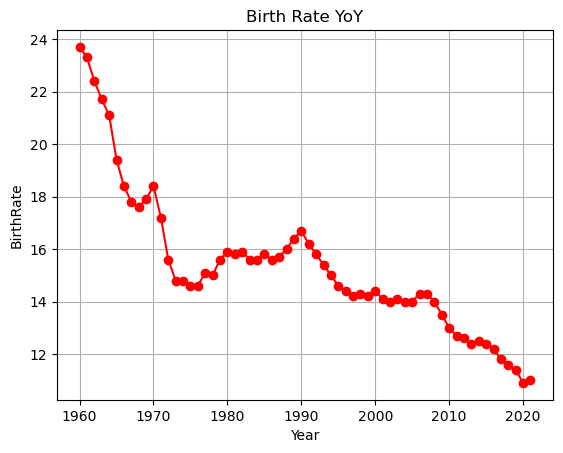

In [472]:
plt.plot(NewBirthrate['Year'], NewBirthrate['BirthRate'], marker='o', linestyle='-', color='r')

plt.title('Birth Rate YoY')
plt.xlabel('Year')
plt.ylabel('BirthRate')
plt.grid(True)  

plt.show()

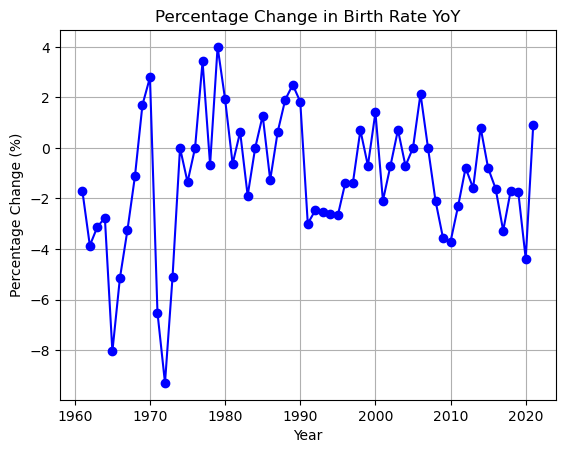

In [473]:
plt.plot(NewBirthrate['Year'], NewBirthrate['BirthRate_PercentageChange'], marker='o', linestyle='-', color='b')
plt.title('Percentage Change in Birth Rate YoY')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.grid(True)  

plt.show()

In [577]:
Incomebeforetaxes_25to34 = pd.read_csv("../FRED/Income_beforetaxes_25to34_perc_change.csv")
Incomebeforetaxes_25to34["Year"] = pd.to_datetime(Incomebeforetaxes_25to34['DATE']).dt.year
Incomebeforetaxes_25to34 = Incomebeforetaxes_25to34.rename(columns={'CXU900000LB0403M_PC1': 'Income25to24_Percentage_Change'})
Incomebeforetaxes_25to34.head(2)

,DATE,Income25to24_Percentage_Change,Year
0,1985-01-01,4.47667,1985
1,1986-01-01,0.57938,1986


In [475]:
# Which year had the biggest percentage change to the negative and positive?
#maximum positive percentage change
max5_positive_change_Income2534 = Incomebeforetaxes_25to34.nlargest(5, 'Income25to24_Percentage_Change')

#maximum negative percentage change
max5_negative_change_Income2534 = Incomebeforetaxes_25to34.nsmallest(5, 'Income25to24_Percentage_Change')


In [476]:
print("Years with the largest POSITVE PERCENTAGE CHANGE change U.S. Annual Median Income for 25-35 Year Olds:")
max5_positive_change_Income2534

Years with the largest POSITVE PERCENTAGE CHANGE change U.S. Annual Median Income for 25-35 Year Olds:


,DATE,Income25to24_Percentage_Change,Year
15,2000-01-01,8.63050,2000
16,2001-01-01,8.25579,2001
12,1997-01-01,7.76867,1997
2,1987-01-01,7.70785,1987
33,2018-01-01,6.76501,2018


In [477]:
print("\nYears with the largest NEGATIVE PERCENTAGE CHANGE for U.S. Annual Median Income for 25-35 Year Olds:")
max5_negative_change_Income2534


Years with the largest NEGATIVE PERCENTAGE CHANGE for U.S. Annual Median Income for 25-35 Year Olds:


,DATE,Income25to24_Percentage_Change,Year
26,2011-01-01,-3.05486,2011
7,1992-01-01,-2.36507,1992
24,2009-01-01,-2.19632,2009
17,2002-01-01,-0.25485,2002
8,1993-01-01,0.03383,1993


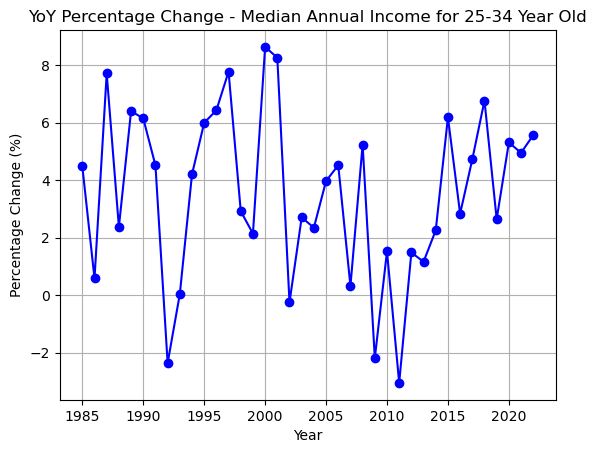

In [478]:
plt.plot(Incomebeforetaxes_25to34['Year'], Incomebeforetaxes_25to34['Income25to24_Percentage_Change'], marker='o', linestyle='-', color='b')

plt.title('YoY Percentage Change - Median Annual Income for 25-34 Year Old')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.grid(True)  

plt.show()

In [479]:
Annual_Incomebeforetaxes_25to34 = pd.read_csv("../FRED/Income_beforetaxes_25to34_annual.csv")
Annual_Incomebeforetaxes_25to34["Year"] = pd.to_datetime(Annual_Incomebeforetaxes_25to34['DATE']).dt.year
Annual_Incomebeforetaxes_25to34 = Annual_Incomebeforetaxes_25to34.rename(columns={'CXU900000LB0403M': 'Annual_Income_25to34'})
Annual_Incomebeforetaxes_25to34.head()

,DATE,Annual_Income_25to34,Year
0,1984-01-01,22137,1984
1,1985-01-01,23128,1985
2,1986-01-01,23262,1986
3,1987-01-01,25055,1987
4,1988-01-01,25649,1988


In [480]:
# Which year had the biggest percentage change to the negative and positive?
#maximum positive percentage change
max5_positive_change_AnnualIncome2534 = Annual_Incomebeforetaxes_25to34.nlargest(5, 'Annual_Income_25to34')

#maximum negative percentage change
max5_negative_change_AnnualIncome2534 = Annual_Incomebeforetaxes_25to34.nsmallest(5, 'Annual_Income_25to34')

In [481]:
print("Years with the largest positive DOLLAR AMOUNT for U.S. Annual Median Income for 25-35 Year Olds:")
max5_positive_change_AnnualIncome2534

Years with the largest positive DOLLAR AMOUNT for U.S. Annual Median Income for 25-35 Year Olds:


,DATE,Annual_Income_25to34,Year
38,2022-01-01,82241,2022
37,2021-01-01,77909,2021
36,2020-01-01,74235,2020
35,2019-01-01,70494,2019
34,2018-01-01,68683,2018


In [482]:
print("\nYears with the largest negative DOLLAR AMOUNT for U.S. Annual Median Income for 25-35 Year Olds:")
max5_negative_change_AnnualIncome2534


Years with the largest negative DOLLAR AMOUNT for U.S. Annual Median Income for 25-35 Year Olds:


,DATE,Annual_Income_25to34,Year
0,1984-01-01,22137,1984
1,1985-01-01,23128,1985
2,1986-01-01,23262,1986
3,1987-01-01,25055,1987
4,1988-01-01,25649,1988


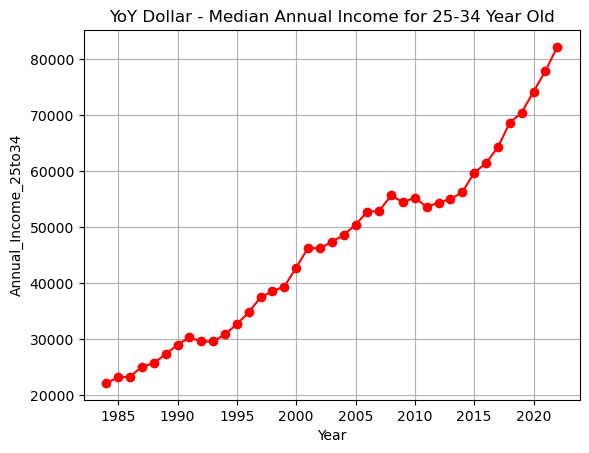

In [483]:
# line graph to vizualize the BIRTH RATE overtime
plt.plot(Annual_Incomebeforetaxes_25to34['Year'], Annual_Incomebeforetaxes_25to34['Annual_Income_25to34'], marker='o', linestyle='-', color='r')
#graph labels
plt.title('YoY Dollar - Median Annual Income for 25-34 Year Old')
plt.xlabel('Year')
plt.ylabel('Annual_Income_25to34')
plt.grid(True)  

# Show plot
plt.show()

In [484]:
Median_household_income_annual = pd.read_csv("../FRED/Median_household_income_annual.csv")
Median_household_income_annual["Year"] = pd.to_datetime(Median_household_income_annual['DATE']).dt.year
Median_household_income_annual = Median_household_income_annual.rename(columns={'MEHOINUSA646N': 'US_Annual_Income'})
Median_household_income_annual.head()

,DATE,US_Annual_Income,Year
0,1984-01-01,22420,1984
1,1985-01-01,23620,1985
2,1986-01-01,24900,1986
3,1987-01-01,26060,1987
4,1988-01-01,27230,1988


In [485]:
# Which year had the biggest percentage change to the negative and positive?
#maximum positive percentage change
max5_positive_change_MedHouseHoldIncome = Median_household_income_annual.nlargest(5, 'US_Annual_Income')

#maximum negative percentage change
max5_negative_change_MedHouseHoldIncome = Median_household_income_annual.nsmallest(5, 'US_Annual_Income')

In [486]:
print("Years with the largest positive percentage change of U.S. Annual Median Income:")
max5_positive_change_MedHouseHoldIncome

Years with the largest positive percentage change of U.S. Annual Median Income:


,DATE,US_Annual_Income,Year
38,2022-01-01,74580,2022
37,2021-01-01,70780,2021
35,2019-01-01,68700,2019
36,2020-01-01,68010,2020
34,2018-01-01,63180,2018


In [487]:
print("\nYears with the largest negative percentage change of U.S. Annual Median Income:")
max5_negative_change_MedHouseHoldIncome


Years with the largest negative percentage change of U.S. Annual Median Income:


,DATE,US_Annual_Income,Year
0,1984-01-01,22420,1984
1,1985-01-01,23620,1985
2,1986-01-01,24900,1986
3,1987-01-01,26060,1987
4,1988-01-01,27230,1988


In [488]:
MediaunHome_saleprice_annual = pd.read_csv("../FRED/MedianHomeSalePriceAnnual.csv")

MediaunHome_saleprice_annual.head(1)

,DATE,MSPUS
0,1963-01-01,18050.000000000000


In [489]:
MediaunHome_saleprice_annual["Year"] = pd.to_datetime(MediaunHome_saleprice_annual['DATE']).dt.year
MediaunHome_saleprice_annual = MediaunHome_saleprice_annual.rename(columns={'MSPUS': 'Annual_Home_SalePrice'})
MediaunHome_saleprice_annual.head(4)

,DATE,Annual_Home_SalePrice,Year
0,1963-01-01,18050.000000000000,1963
1,1964-01-01,18925.000000000000,1964
2,1965-01-01,20125.000000000000,1965
3,1966-01-01,21500.000000000000,1966


In [490]:
#Removing all the extra zeros from the "annual home sale price" column above
MediaunHome_saleprice_annual['Annual_Home_SalePrice'] = MediaunHome_saleprice_annual['Annual_Home_SalePrice'].astype(str).str.rstrip('0').str.rstrip('.')

# Convert the column back to numeric
MediaunHome_saleprice_annual['Annual_Home_SalePrice'] = pd.to_numeric(MediaunHome_saleprice_annual['Annual_Home_SalePrice'])
MediaunHome_saleprice_annual.head(5)

,DATE,Annual_Home_SalePrice,Year
0,1963-01-01,18050.0,1963
1,1964-01-01,18925.0,1964
2,1965-01-01,20125.0,1965
3,1966-01-01,21500.0,1966
4,1967-01-01,22750.0,1967


In [491]:
mergedINCOME_to_HOMESALEPRICE = pd.merge(MediaunHome_saleprice_annual, Median_household_income_annual, on='Year')

# Calculate the ratio of Annual_Home_SalePrice to US_Annual_Income
mergedINCOME_to_HOMESALEPRICE['Price_to_Income_Ratio'] = mergedINCOME_to_HOMESALEPRICE['Annual_Home_SalePrice'] / mergedINCOME_to_HOMESALEPRICE['US_Annual_Income']

mergedINCOME_to_HOMESALEPRICE.head()

,DATE_x,Annual_Home_SalePrice,Year,DATE_y,US_Annual_Income,Price_to_Income_Ratio
0,1984-01-01,79950.0,1984,1984-01-01,22420,3.566012
1,1985-01-01,84275.0,1985,1985-01-01,23620,3.567951
2,1986-01-01,92025.0,1986,1986-01-01,24900,3.695783
3,1987-01-01,104700.0,1987,1987-01-01,26060,4.017652
4,1988-01-01,112225.0,1988,1988-01-01,27230,4.121373


In [492]:
#deleted the two extra date columns from when the files were merged.
# Purpose: I believe the Med Annual Home Sale Price alone 
#does not tell us anything.
#Also, the Med annual income does not tell us anything alone. 
# Therefore, I created a ratio between the med home sale price 
# annual income. My hypothesis, is that the higher the ratio, 
# the less affordable. 
NEW_INCOME_to_HOMESALEPRICE = mergedINCOME_to_HOMESALEPRICE.drop(['DATE_x', 'DATE_y'], axis=1)
NEW_INCOME_to_HOMESALEPRICE.tail()

,Annual_Home_SalePrice,Year,US_Annual_Income,Price_to_Income_Ratio
34,325275.0,2018,63180,5.148386
35,320250.0,2019,68700,4.661572
36,336950.0,2020,68010,4.954418
37,396800.0,2021,70780,5.606103
38,457475.0,2022,74580,6.134017


In [493]:
# Which year had the biggest percentage change to the negative and positive?
#maximum positive percentage change
max5_positive_change_INCOMEHomeSaleRatio = NEW_INCOME_to_HOMESALEPRICE.nlargest(5, 'Price_to_Income_Ratio')

#maximum negative percentage change
max5_negative_change_INCOMEHomeSaleRatio = NEW_INCOME_to_HOMESALEPRICE.nsmallest(5, 'Price_to_Income_Ratio')

In [494]:
print("Years with the largest POSITVE PERCENTAGE CHANGE of INCOME TO HOME SALE PRICE RATIO:")
max5_positive_change_INCOMEHomeSaleRatio

Years with the largest POSITVE PERCENTAGE CHANGE of INCOME TO HOME SALE PRICE RATIO:


,Annual_Home_SalePrice,Year,US_Annual_Income,Price_to_Income_Ratio
38,457475.0,2022,74580,6.134017
37,396800.0,2021,70780,5.606103
30,285775.0,2014,53660,5.325662
33,322425.0,2017,61140,5.273553
31,294150.0,2015,56520,5.204352


In [495]:
print("Years with the largest NEGATIVE PERCENTAGE CHANGE of INCOME TO HOME SALE PRICE RATIO:")
max5_negative_change_INCOMEHomeSaleRatio

Years with the largest NEGATIVE PERCENTAGE CHANGE of INCOME TO HOME SALE PRICE RATIO:


,Annual_Home_SalePrice,Year,US_Annual_Income,Price_to_Income_Ratio
0,79950.0,1984,22420,3.566012
1,84275.0,1985,23620,3.567951
2,92025.0,1986,24900,3.695783
14,151925.0,1998,38890,3.906531
11,133475.0,1995,34080,3.916520


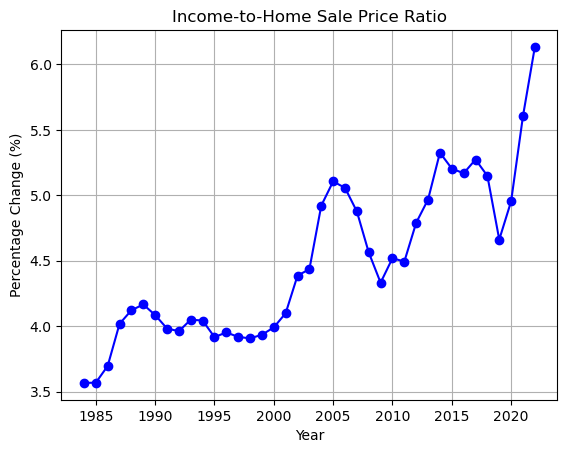

In [620]:
plt.plot(NEW_INCOME_to_HOMESALEPRICE['Year'], NEW_INCOME_to_HOMESALEPRICE['Price_to_Income_Ratio'], marker='o', linestyle='-', color='b')
plt.title('Income-to-Home Sale Price Ratio')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.grid(True)  

plt.show()

In [497]:
import plotly.express as px

In [608]:
fig = px.line(NEW_INCOME_to_HOMESALEPRICE, x='Year', y=['Annual_Home_SalePrice', 'US_Annual_Income'],
              title='Annual Home Sale Price vs. US Annual Income Over Years',
              labels={'value': 'Amount', 'Year': 'Year'},
              line_shape='linear')  

fig.update_layout(
    width=900,  
    height=600,  
    xaxis_title='Year',  
    yaxis_title='Amount',  
    legend_title='Variable',  
    hovermode='x unified'  
)

# Show plot
fig.show()

In [499]:
import plotly.express as px

fig = px.line(NEW_INCOME_to_HOMESALEPRICE, x='Year', y=['Annual_Home_SalePrice', 'US_Annual_Income'],
              title='Annual Home Sale Price vs. US Annual Income Over Years',
              labels={'value': 'Amount', 'Year': 'Year'},
              line_shape='linear')

negative_BirthRateyears = [1989,2006]  

for year in negative_BirthRateyears:
    fig.add_vline(x=year, line_dash='dash', line_color='red', annotation_text=f'Negative Change: {year}')

fig.update_layout(
    width=900,  
    height=600,  
    xaxis_title='Year',  
    yaxis_title='Amount',  
    legend_title='Variable',  
    hovermode='x unified'  
)
fig.show()

In [500]:
ConsumerSentiment_annual = pd.read_csv("../FRED/ConsumerSentiment.csv")

ConsumerSentiment_annual.head(2)

,DATE,UMCSENT
0,"Thursday, January 1, 1953",84.066667
1,"Friday, January 1, 1954",83.966667


In [581]:

ConsumerSentiment_annual["Year"] = pd.to_datetime(ConsumerSentiment_annual['DATE'], infer_datetime_format=True).dt.year

ConsumerSentiment_annual = ConsumerSentiment_annual.rename(columns={'UMCSENT': 'ConsumerSentiment'})


ConsumerSentiment_annual.head(2)


/var/folders/3z/z694z0m10zzdtngkgj2cbnsc0000gp/T/ipykernel_9834/3572280144.py:1: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



,DATE,ConsumerSentiment,Year
0,"Thursday, January 1, 1953",84.066667,1953
1,"Friday, January 1, 1954",83.966667,1954


In [502]:
ConsumerSentiment_annual = ConsumerSentiment_annual.rename(columns={'UMCSENT': 'ConsumerSentiment'})


In [503]:
ConsumerSentiment_annual.dtypes

DATE                  object
ConsumerSentiment    float64
Year                   int32
dtype: object

In [504]:
ConsumerSentiment_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE               71 non-null     object 
 1   ConsumerSentiment  71 non-null     float64
 2   Year               71 non-null     int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 1.5+ KB


In [505]:
ConsumerSentiment_annual["ConsumerSentiment"].min()

58.975

In [506]:
fig = px.line(ConsumerSentiment_annual, x='Year', y='ConsumerSentiment',
              title='Consumer Sentiment From 1953-2023',
              labels={'ConsumerSentiment': 'Consumer Sentiment', 'Year': 'Year'})

fig.update_layout(
    xaxis_title='Year',  
    yaxis_title='Consumer Sentiment',  
    width=1000,  
    height=700  
)
fig.show()

In [593]:
# Which year had the biggest percentage change to the negative and positive?
#maximum positive percentage change
max5_consumer_sentiment = ConsumerSentiment_annual.nlargest(3, 'ConsumerSentiment')

#maximum negative percentage change
low5_consumer_sentiment = ConsumerSentiment_annual.nsmallest(3, 'ConsumerSentiment')

In [594]:
max5_consumer_sentiment

,DATE,ConsumerSentiment,Year
47,"Saturday, January 1, 2000",107.575000,2000
46,"Friday, January 1, 1999",105.825000,1999
45,"Thursday, January 1, 1998",104.616667,1998


In [597]:
low5_consumer_sentiment

,DATE,ConsumerSentiment,Year
69,"Saturday, January 1, 2022",58.975000,2022
55,"Tuesday, January 1, 2008",63.750000,2008
27,"Tuesday, January 1, 1980",64.416667,1980


In [598]:
max5_consumer_sentiment_year = max5_consumer_sentiment["Year"]

In [599]:
low5_consumer_sentiment_year = low5_consumer_sentiment["Year"]

In [603]:
max5_consumer_sentiment_year

47    2000
46    1999
45    1998
Name: Year, dtype: int32

In [600]:
low5_consumer_sentiment_year

69    2022
55    2008
27    1980
Name: Year, dtype: int32

In [507]:
birthrate_df.min()

DATE         1960-01-01
BirthRate          10.9
dtype: object

In [508]:
metausers_df.min()

Year             2016.00
META_users_Q4       1.86
dtype: float64

In [509]:
Incomebeforetaxes_25to34.min()

DATE                              1985-01-01
Income25to24_Percentage_Change      -3.05486
Year                                    1985
dtype: object

In [510]:
Annual_Incomebeforetaxes_25to34.min()

DATE                    1984-01-01
Annual_Income_25to34         22137
Year                          1984
dtype: object

In [511]:
Median_household_income_annual.min()

DATE                1984-01-01
US_Annual_Income         22420
Year                      1984
dtype: object

In [512]:
MediaunHome_saleprice_annual.min()

DATE                     1963-01-01
Annual_Home_SalePrice       18050.0
Year                           1963
dtype: object

In [513]:
NEW_INCOME_to_HOMESALEPRICE.min()

Annual_Home_SalePrice    79950.000000
Year                      1984.000000
US_Annual_Income         22420.000000
Price_to_Income_Ratio        3.566012
dtype: float64

In [514]:

# Print the columns of the birthrate_df DataFrame
print(NewBirthrate.columns)


Index(['Year', 'BirthRate', 'BirthRate_PercentageChange'], dtype='object')


In [515]:
NewBirthrate.dtypes

Year                            int32
BirthRate                     float64
BirthRate_PercentageChange    float64
dtype: object

In [516]:
import pandas as pd

# Assuming NewBirthrate is your existing DataFrame with columns 'Year' and 'BirthRate'

# Filter rows where 'Year' is between 1984 and 2022
Newbirthrate_1984_2022df = NewBirthrate[(NewBirthrate['Year'] >= 1984) & (NewBirthrate['Year'] <= 2022)]

# Display the new DataFrame
Newbirthrate_1984_2022df.head(2)



,Year,BirthRate,BirthRate_PercentageChange
24,1984,15.6,0.000000
25,1985,15.8,1.282051


In [614]:
start_year = 1984
end_year = 2022

dataframes_to_merge = [
    Newbirthrate_1984_2022df,
    Incomebeforetaxes_25to34,
    Annual_Incomebeforetaxes_25to34,
    Median_household_income_annual,
    MediaunHome_saleprice_annual,
    NEW_INCOME_to_HOMESALEPRICE,
    ConsumerSentiment_annual
]

filtered_dataframes = []

for df in dataframes_to_merge:
    filtered_df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    filtered_dataframes.append(filtered_df)

merged_df = filtered_dataframes[0]  

for df in filtered_dataframes[1:]:
    merged_df = pd.merge(
        merged_df,
        df,
        on='Year',
        how='outer',
        suffixes=('', '_other')  
    )

# Display the merged DataFrame
merged_df.head(2)



,Year,BirthRate,BirthRate_PercentageChange,DATE,Income25to24_Percentage_Change,DATE_other,Annual_Income_25to34,DATE_other,US_Annual_Income,DATE_other,Annual_Home_SalePrice,Annual_Home_SalePrice_other,US_Annual_Income_other,Price_to_Income_Ratio,DATE_other,ConsumerSentiment
0,1984,15.6,0.000000,NaN,NaN,1984-01-01,22137,1984-01-01,22420,1984-01-01,79950.0,79950.0,22420,3.566012,"Sunday, January 1, 1984",97.475000
1,1985,15.8,1.282051,1985-01-01,4.47667,1985-01-01,23128,1985-01-01,23620,1985-01-01,84275.0,84275.0,23620,3.567951,"Tuesday, January 1, 1985",93.166667


In [615]:
all_merged_df = merged_df.drop(columns=['DATE_other'])
all_merged_df.head(2)

,Year,BirthRate,BirthRate_PercentageChange,DATE,Income25to24_Percentage_Change,Annual_Income_25to34,US_Annual_Income,Annual_Home_SalePrice,Annual_Home_SalePrice_other,US_Annual_Income_other,Price_to_Income_Ratio,ConsumerSentiment
0,1984,15.6,0.000000,NaN,NaN,22137,22420,79950.0,79950.0,22420,3.566012,97.475000
1,1985,15.8,1.282051,1985-01-01,4.47667,23128,23620,84275.0,84275.0,23620,3.567951,93.166667


In [616]:
Variables = [
    'BirthRate',
    'BirthRate_PercentageChange',
    'Income25to24_Percentage_Change',
    'Annual_Income_25to34',
    'US_Annual_Income',
    'Annual_Home_SalePrice',
    'Price_to_Income_Ratio', 'ConsumerSentiment'
]

# Subset the DataFrame to include only the selected columns
Variables = all_merged_df[Variables]

# Compute the correlation matrix using the corr() method
correlation_matrix = Variables.corr()

# Display the correlation matrix
print("Correlation Matrix:")
correlation_matrix



Correlation Matrix:


,BirthRate,BirthRate_PercentageChange,Income25to24_Percentage_Change,Annual_Income_25to34,US_Annual_Income,Annual_Home_SalePrice,Price_to_Income_Ratio,ConsumerSentiment
BirthRate,1.000000,0.369603,0.052795,-0.943773,-0.952328,-0.931450,-0.778886,0.135482
BirthRate_PercentageChange,0.369603,1.000000,0.257301,-0.287154,-0.287770,-0.214633,-0.051585,0.358953
Income25to24_Percentage_Change,0.052795,0.257301,1.000000,0.002941,0.005048,0.030268,0.012616,0.375371
Annual_Income_25to34,-0.943773,-0.287154,0.002941,1.000000,0.994951,0.978548,0.883668,-0.362204
US_Annual_Income,-0.952328,-0.287770,0.005048,0.994951,1.000000,0.980749,0.877471,-0.322087
Annual_Home_SalePrice,-0.931450,-0.214633,0.030268,0.978548,0.980749,1.000000,0.942216,-0.357803
Price_to_Income_Ratio,-0.778886,-0.051585,0.012616,0.883668,0.877471,0.942216,1.000000,-0.382742
ConsumerSentiment,0.135482,0.358953,0.375371,-0.362204,-0.322087,-0.357803,-0.382742,1.000000


/var/folders/3z/z694z0m10zzdtngkgj2cbnsc0000gp/T/ipykernel_9834/526669597.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3z/z694z0m10zzdtngkgj2cbnsc0000gp/T/ipykernel_9834/526669597.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



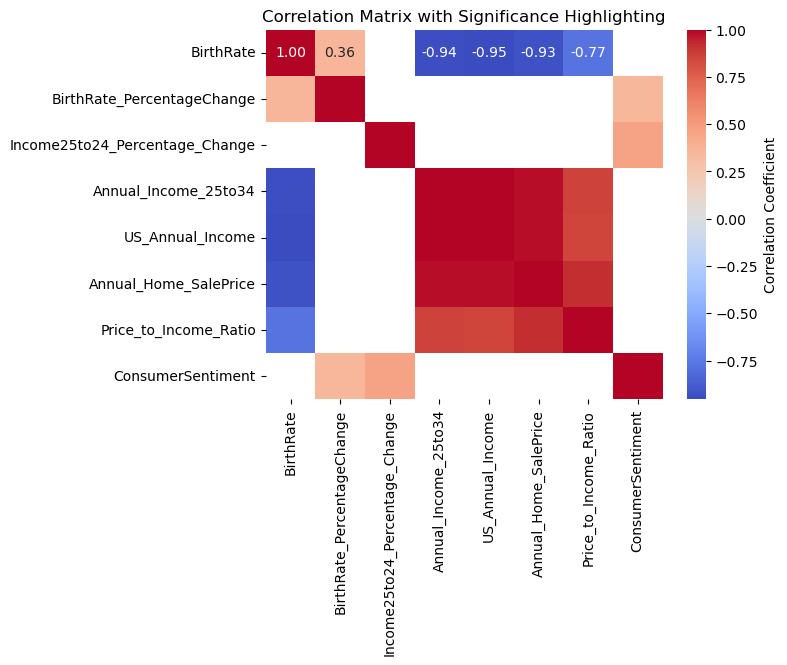

In [618]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np

selected_columns = [
    'BirthRate',
    'BirthRate_PercentageChange',
    'Income25to24_Percentage_Change',
    'Annual_Income_25to34',
    'US_Annual_Income',
    'Annual_Home_SalePrice',
    'Price_to_Income_Ratio', 
    'ConsumerSentiment'
]

selected_df = all_merged_df[selected_columns]

# Replace infinite values with NaN
selected_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN values
selected_df.dropna(inplace=True)

correlation_matrix = selected_df.corr()

p_values = pd.DataFrame(np.zeros_like(correlation_matrix), columns=correlation_matrix.columns, index=correlation_matrix.index)

for col1 in selected_columns:
    for col2 in selected_columns:
        if col1 != col2:
            corr, p_value = stats.pearsonr(selected_df[col1], selected_df[col2])
            p_values.loc[col1, col2] = p_value

significance_threshold = 0.05

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    mask=(p_values >= significance_threshold),
    cbar_kws={"label": "Correlation Coefficient"}
)

import matplotlib.pyplot as plt
plt.title("Correlation Matrix with Significance Highlighting")
plt.show()





In [619]:
# Define the significance threshold
significance_threshold = 0.05

# Filter the correlation matrix to extract significant correlations
significant_correlations = correlation_matrix[(p_values < significance_threshold) & (p_values != 0)]

# Create a summary of significant correlations
summary = "Significant Correlations (p < {}):\n\n".format(significance_threshold)

# Iterate over the significant correlations and add them to the summary
for col1 in significant_correlations.index:
    for col2 in significant_correlations.columns:
        if col1 != col2:
            correlation_coefficient = significant_correlations.loc[col1, col2]
            p_value = p_values.loc[col1, col2]
            summary += "Correlation between {} and {}: {:.2f} (p-value: {:.4f})\n".format(col1, col2, correlation_coefficient, p_value)

# Print the summary
print(summary)


Significant Correlations (p < 0.05):

Correlation between BirthRate and BirthRate_PercentageChange: 0.36 (p-value: 0.0278)
Correlation between BirthRate and Income25to24_Percentage_Change: nan (p-value: 0.7563)
Correlation between BirthRate and Annual_Income_25to34: -0.94 (p-value: 0.0000)
Correlation between BirthRate and US_Annual_Income: -0.95 (p-value: 0.0000)
Correlation between BirthRate and Annual_Home_SalePrice: -0.93 (p-value: 0.0000)
Correlation between BirthRate and Price_to_Income_Ratio: -0.77 (p-value: 0.0000)
Correlation between BirthRate and ConsumerSentiment: nan (p-value: 0.5039)
Correlation between BirthRate_PercentageChange and BirthRate: 0.36 (p-value: 0.0278)
Correlation between BirthRate_PercentageChange and Income25to24_Percentage_Change: nan (p-value: 0.1242)
Correlation between BirthRate_PercentageChange and Annual_Income_25to34: nan (p-value: 0.0983)
Correlation between BirthRate_PercentageChange and US_Annual_Income: nan (p-value: 0.0977)
Correlation between 

In [561]:
googletrends = pd.read_csv("../FRED/Timeline_googletrends.csv")

googletrends.head(2)

,Month,Birth rate: (United States),Online dating: (United States),home for sale: (United States)
0,2004-01,1,19,14
1,2004-02,3,18,14


In [571]:
googletrends = googletrends.rename(columns={'Birth rate: (United States)': 'U.S. Birth rate Search'})
googletrends = googletrends.rename(columns={'Online dating: (United States)': 'U.S. Online dating Search'})
googletrends = googletrends.rename(columns={'home for sale: (United States)': 'U.S. Home for Sale'})
googletrends['Month'] = pd.to_datetime(googletrends['Month'])
googletrends['Year'] = googletrends['Month'].dt.year
googletrends.head(4)

,Month,Birth rate,U.S. Online dating Search,U.S. Home for sale,Year
0,2004-01-01,1,19,14,2004
1,2004-02-01,3,18,14,2004
2,2004-03-01,2,17,14,2004
3,2004-04-01,2,17,15,2004


In [574]:
avg_trends = googletrends.groupby('Year').mean().reset_index()
avg_trends = avg_trends.drop(['Month'], axis=1)

avg_trends.head(2)



,Year,Birth rate,U.S. Online dating Search,U.S. Home for sale
0,2004,1.750000,18.250000,13.666667
1,2005,1.666667,19.416667,14.166667


In [575]:
avg_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       21 non-null     int32  
 1   Birth rate                 21 non-null     float64
 2   U.S. Online dating Search  21 non-null     float64
 3   U.S. Home for sale         21 non-null     float64
dtypes: float64(3), int32(1)
memory usage: 720.0 bytes


In [576]:


# Plot the line graph using Plotly Express
fig = px.line(avg_trends, x='Year', y=['Birth rate', 'U.S. Online dating Search', 'U.S. Home for sale'],
              title='Trends Over Years (United States)',
              labels={'value': 'Count', 'Year': 'Year', 'variable': 'Variable'})

# Customize the layout
fig.update_layout(
    width=900,  # Set the width of the figure (in pixels)
    height=600,  # Set the height of the figure (in pixels)
    xaxis_title='Year',  # X-axis label
    yaxis_title='Count',  # Y-axis label
    legend_title='Variable',  # Legend title
    hovermode='x unified'  # Show hover information for all lines
)

# Show the plot
fig.show()


In [580]:


# Filter data within the specified year range (1985 to 2022)
affordabilityRatio_filtered = NEW_INCOME_to_HOMESALEPRICE[(NEW_INCOME_to_HOMESALEPRICE['Year'] >= 1985) & (NEW_INCOME_to_HOMESALEPRICE['Year'] <= 2022)]
birthrate_filtered = NewBirthrate[(NewBirthrate['Year'] >= 1985) & (NewBirthrate['Year'] <= 2022)]

# Merge the filtered DataFrames on 'Year'
affordabilityRatio_birthrate_merged_df = pd.merge(affordabilityRatio_filtered, birthrate_filtered, on='Year', how='inner')

# Plot the line graph using Plotly Express
fig = px.line(affordabilityRatio_birthrate_merged_df, x='Year', y=['Price_to_Income_Ratio', 'BirthRate'],
              title='Price to Income Ratio vs. Birth Rate Percentage Change (1985-2022)',
              labels={'value': 'Value', 'Year': 'Year', 'variable': 'Variable'})

# Customize the layout
fig.update_layout(
    width=900,  # Set the width of the figure (in pixels)
    height=600,  # Set the height of the figure (in pixels)
    xaxis_title='Year',  # X-axis label
    yaxis_title='Value',  # Y-axis label
    legend_title='Variable',  # Legend title
    hovermode='x unified'  # Show hover information for all lines
)
fig.update_layout(yaxis=dict(matches='y'))
# Show the plot
fig.show()


In [617]:
## import plotly.express as px

fig = px.line(NewBirthrate, x='Year', y=['BirthRate'],
              title='Birth Rate & Consumer Sentiment Top 3 Lowest & Highest Years',
              labels={'value': 'Amount', 'Year': 'Year'},
              line_shape='linear')

Consumersentiment_low = [2022,2008,1980]  
Consumersentiment_high = [2000,1999,1998]  

for year in Consumersentiment_low:
    fig.add_vline(x=year, line_dash='dash', line_color='red', annotation_text=f'{year}')
for year in Consumersentiment_high:
    fig.add_vline(x=year, line_dash='dash', line_color='green', annotation_text=f'{year}')


fig.update_layout(
    width=1200,  
    height=600,  
    xaxis_title='Year',  
    yaxis_title='Amount',  
    legend_title='Variable',  
    hovermode='x unified'  
)
fig.show()